# Problem statement (Census):
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

In the daset Income is the target variable which has two classes so it termed to be a Classification problem. Here the prediction task is to determine whether a person makes over $50K a year.

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

We can observe that the dataset is having 32560 rows and 15 columns

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

 We can observe that target variable is object datatype

In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can observe that there are no null values in dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [7]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

We can observe there are 2 classes in target variable

### Lets separating categorical varibale and continous varibales

In [8]:
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [9]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# EDA

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


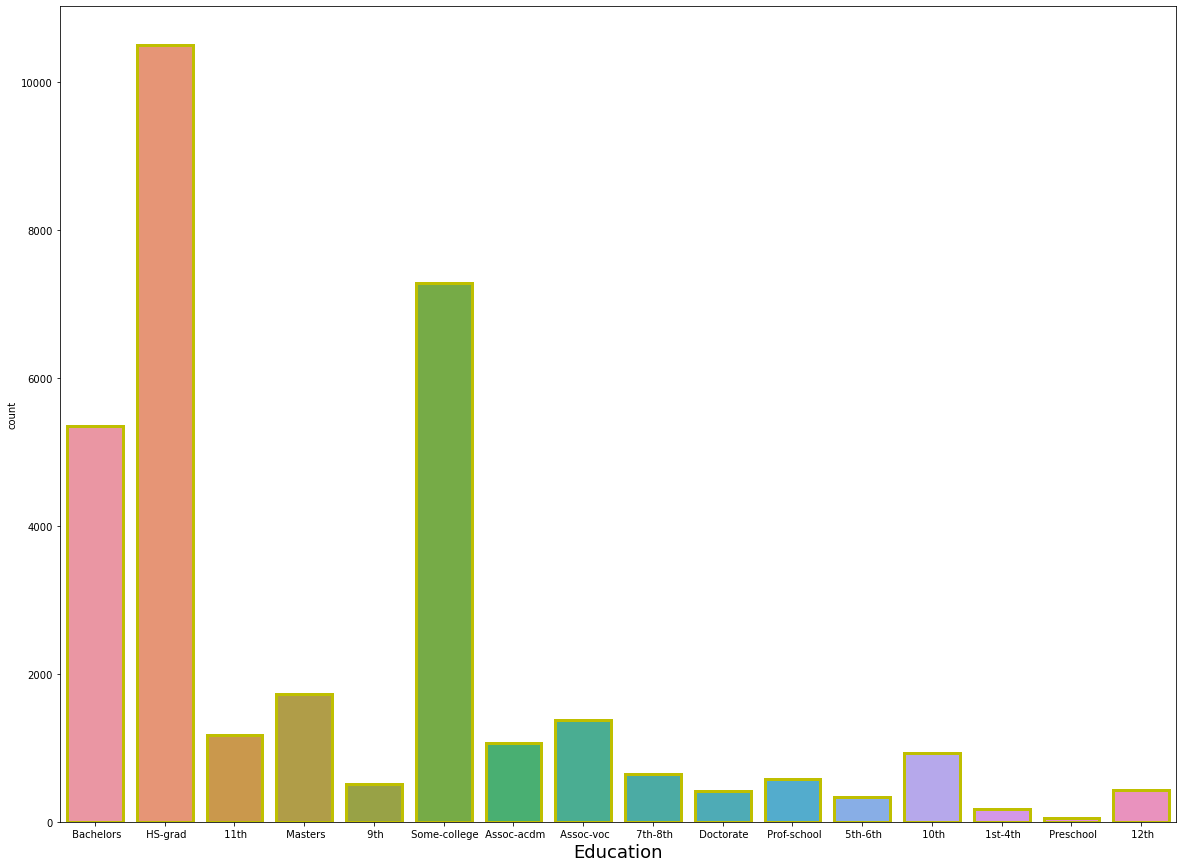

In [10]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='Education',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Education',fontsize=18)
print(df['Education'].value_counts())

We can observe that most of the people are HS_graduate

 Male      21789
 Female    10771
Name: Sex, dtype: int64


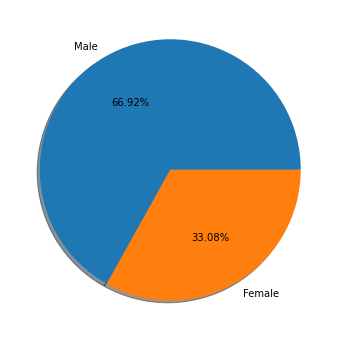

In [11]:
print(df['Sex'].value_counts())
labels='Male','Female'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Sex'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observe that most of the citizens are male

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


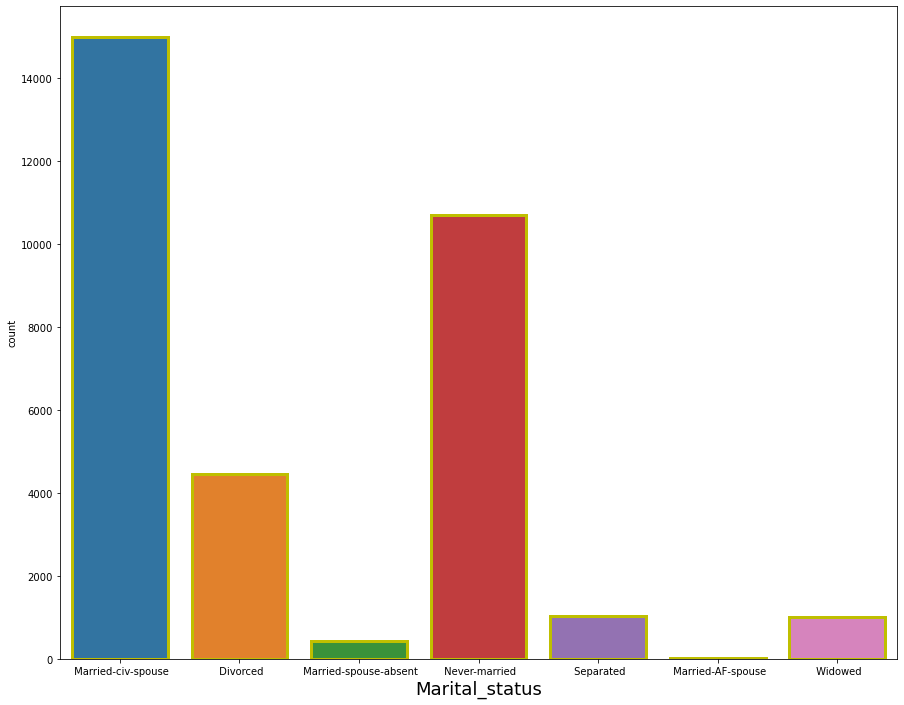

In [12]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='Marital_status',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Marital_status',fontsize=18)
print(df['Marital_status'].value_counts())

 We can observe that most of the citizens are married civilian spouse.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


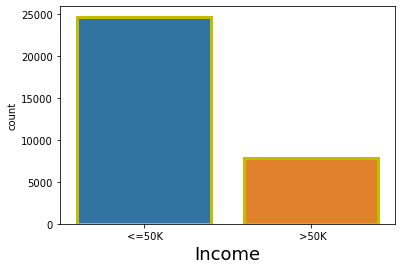

In [13]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Income',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Income',fontsize=18)
print(df['Income'].value_counts())

We can observe that most of the people earning less than 50 k

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


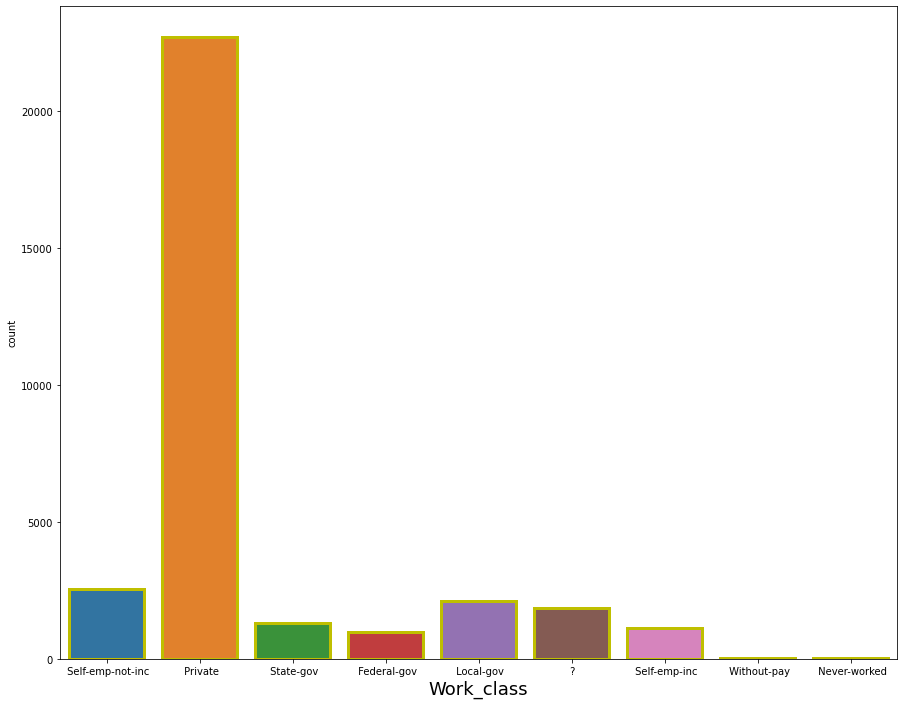

In [14]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='Workclass',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Work_class',fontsize=18)
print(df['Workclass'].value_counts())

We can observe that most of the citizens are working in private sector

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


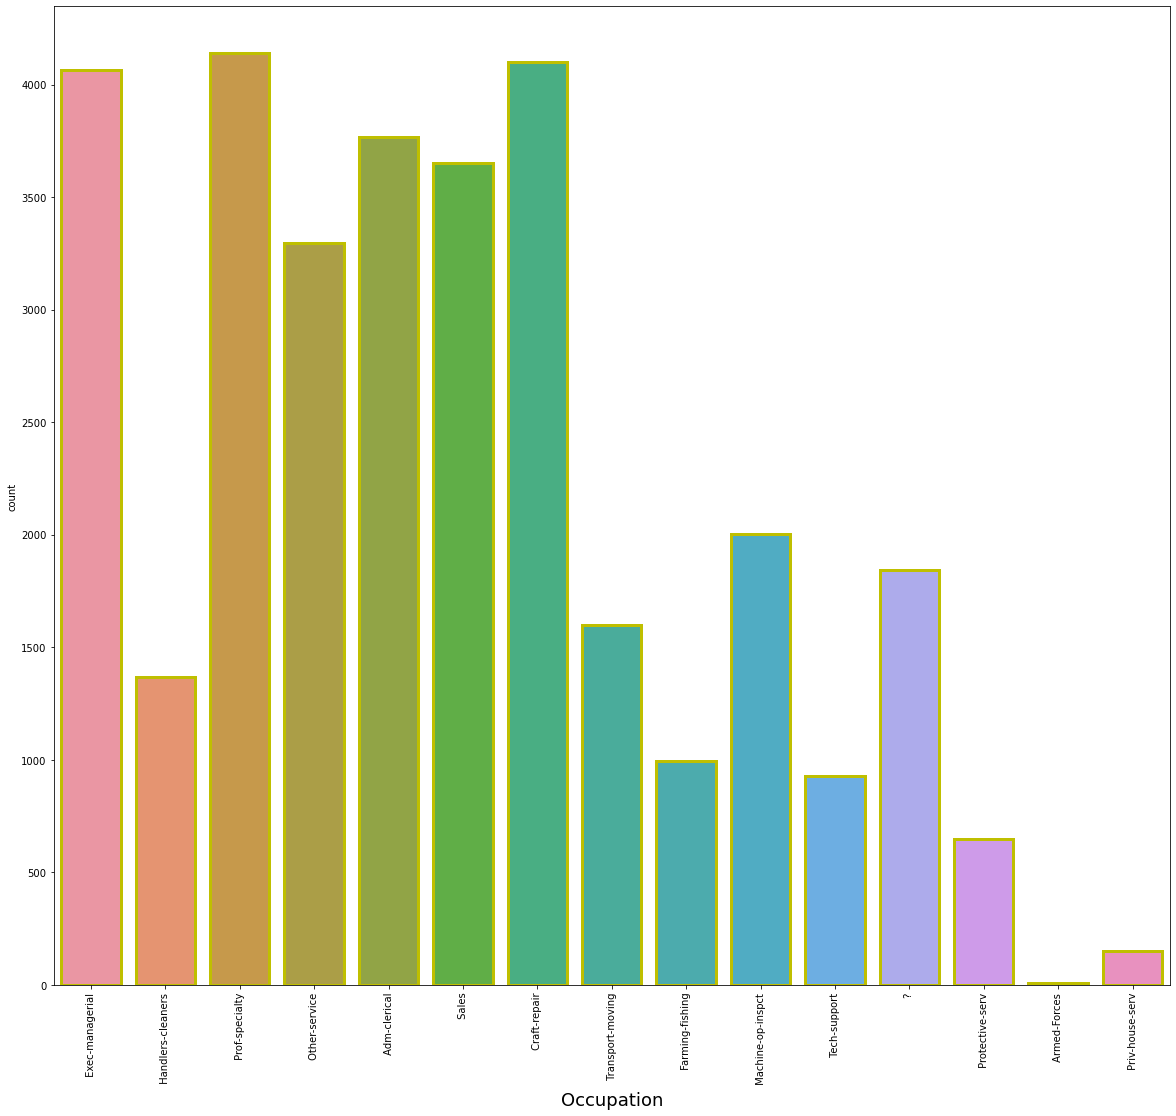

In [15]:
plt.figure(figsize=(20,18))
ax=sns.countplot(x='Occupation',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Occupation',fontsize=18)
plt.xticks(rotation=90)
print(df['Occupation'].value_counts())

We can observe that most of the citizens are from Prof-Speciclity background

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


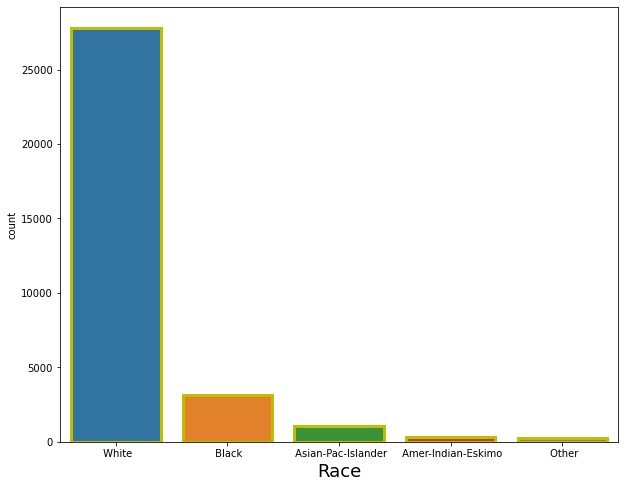

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Race',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Race',fontsize=18)
print(df['Race'].value_counts())

We can observe that most of the people are white in colour

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


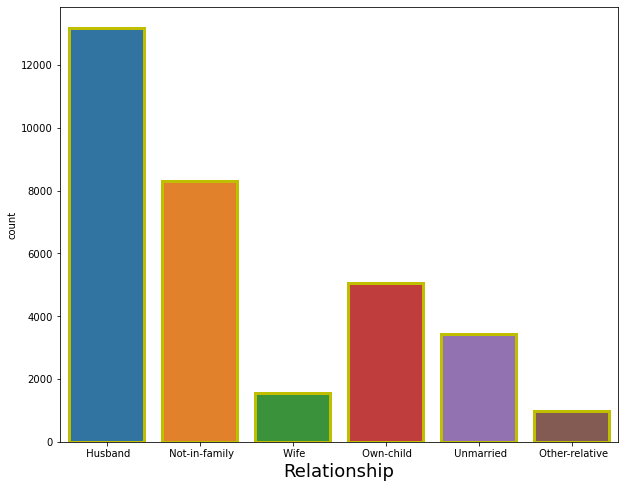

In [17]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Relationship',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Relationship',fontsize=18)
print(df['Relationship'].value_counts())

 We can see that most of the people are husbands

In [18]:
df_cont=df[num_col]

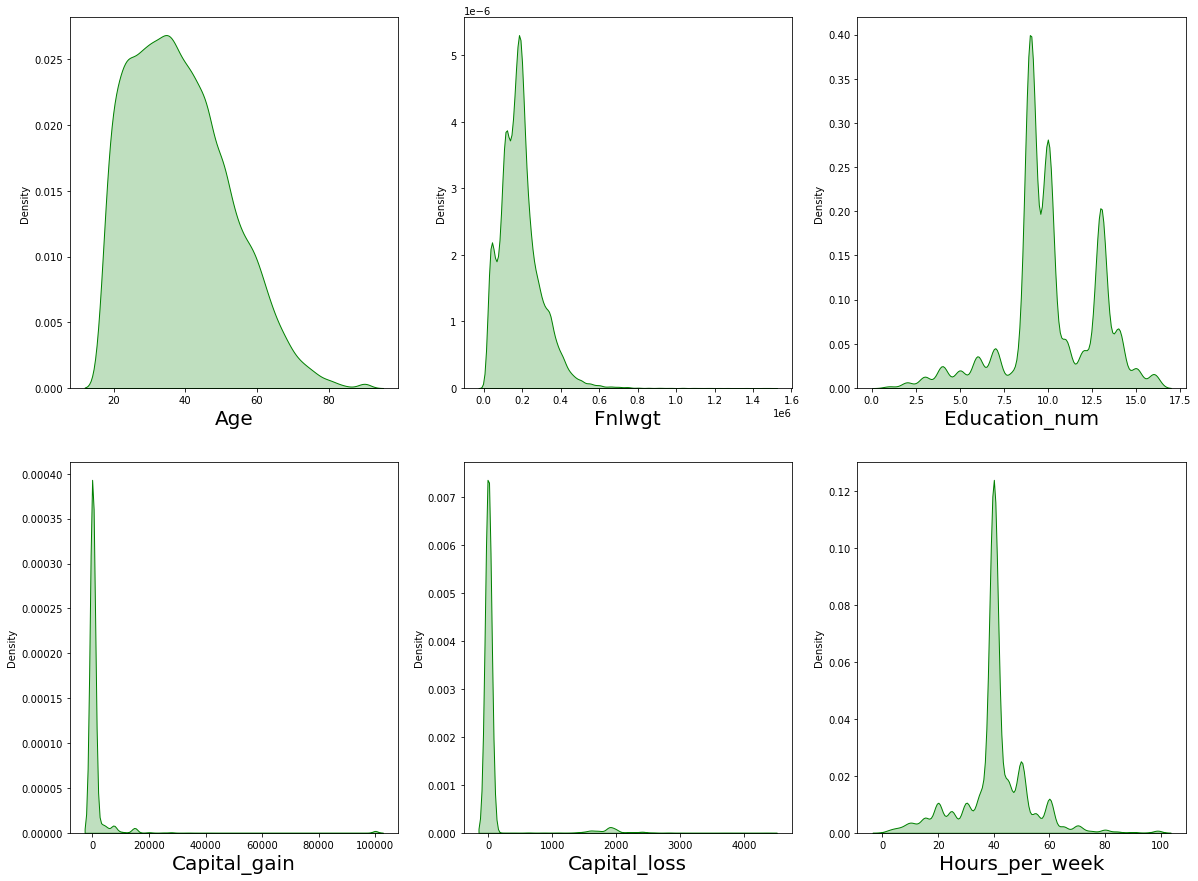

In [19]:
#Lets check the distribution of continous columns
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df_cont:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_cont[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observd that all columns are skewed in which columns Capital_gain and Capital_loss are highly skewed to right

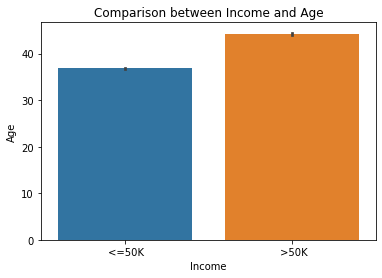

In [20]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Income and Age")
sns.barplot(df['Income'],df['Age'],data = df)
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

 We can observe that most of the citizens earning greater than 50k are over 35 years

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

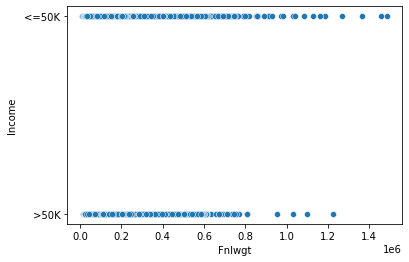

In [21]:
sns.scatterplot(df['Fnlwgt'],df['Income'])

We can observe that Final Weight is continous till 0.8

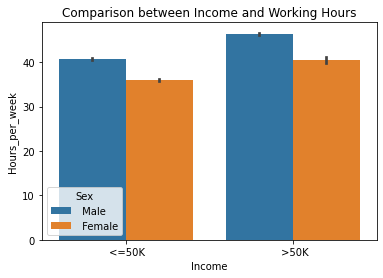

In [22]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Income and Working Hours")
sns.barplot(df['Income'],df['Hours_per_week'],hue='Sex',data = df)
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.show()

We can observe that people earning more than 50k are working more  and number of males are greater in mumber

<AxesSubplot:xlabel='Fnlwgt', ylabel='Hours_per_week'>

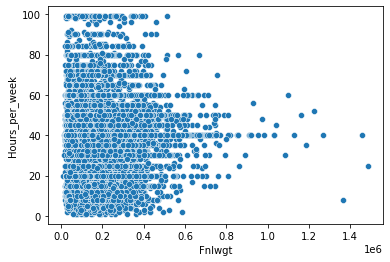

In [23]:
sns.scatterplot(df['Fnlwgt'],df['Hours_per_week'])

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

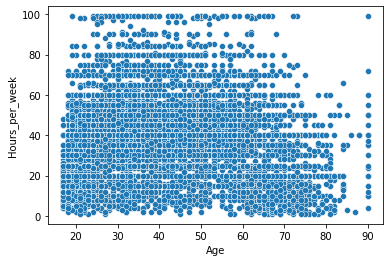

In [24]:
sns.scatterplot(df['Age'],df['Hours_per_week'])

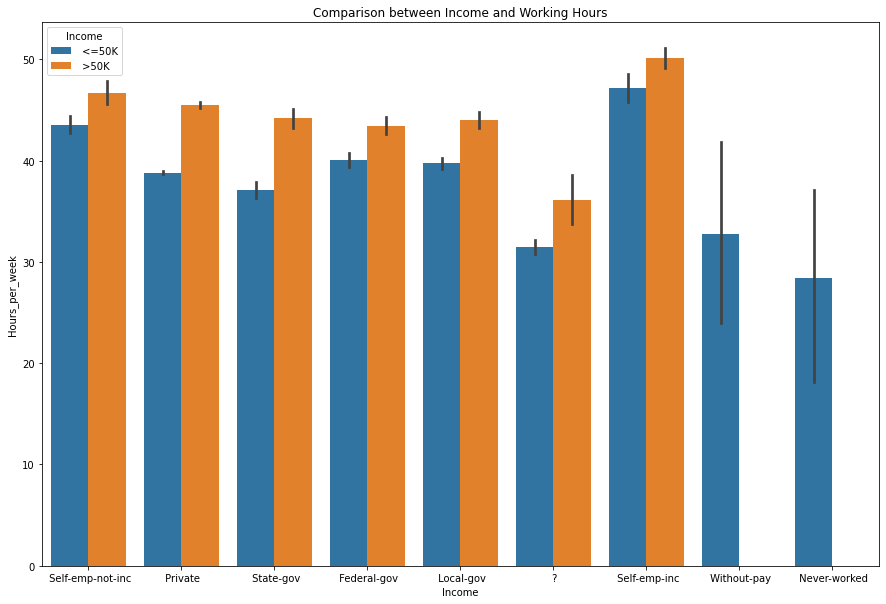

In [25]:
plt.figure(figsize=(15,10))
plt.title("Comparison between Income and Working Hours")
sns.barplot(df['Workclass'],df['Hours_per_week'],hue='Income',data = df)
plt.xlabel("Income")
plt.ylabel("Hours_per_week")
plt.show()

We can observe that self employed people are working more no. of hours 

<Figure size 720x720 with 0 Axes>

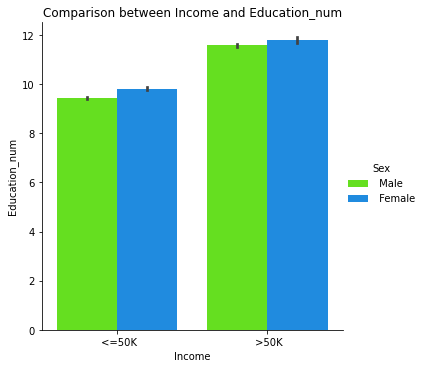

In [26]:
# Visualizing the number of Education with income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education_num')
plt.show()


<Figure size 720x720 with 0 Axes>

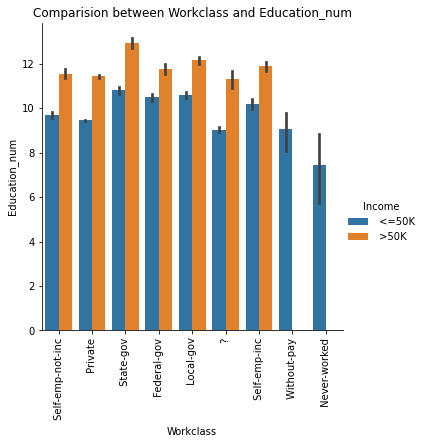

In [27]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()


<Figure size 720x720 with 0 Axes>

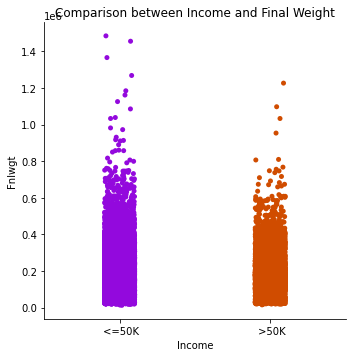

In [28]:
# Visualizing the Final Weight of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt',data=df,kind='strip',palette="gnuplot")
plt.title('Comparison between Income and Final Weight')
plt.show()


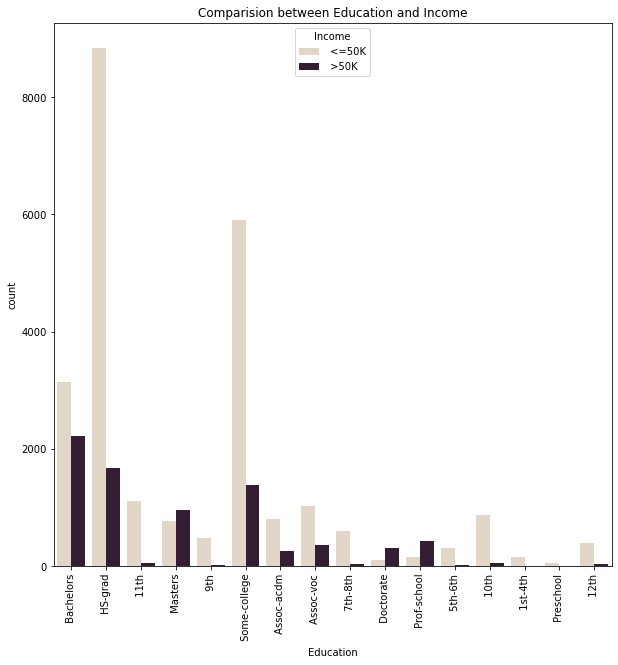

In [29]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Education"],hue=df["Income"],palette='ch:.25')
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

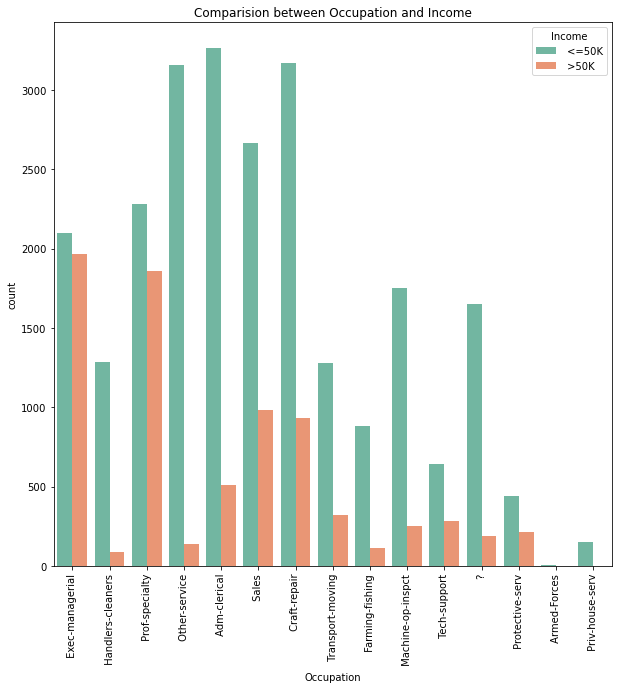

In [30]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette='Set2')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()


We can observe that:-

Most of the people works in admin clerical post and earning less thn 50k  among all the positions


People working in managerial post earnining more than 50k among all the positions

### Checking for '? ' in columns

In [31]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [32]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [33]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [34]:
df['Occupation']=df['Occupation'].replace('?',df['Occupation'].mode()[0])

In [35]:
df['Workclass']=df['Workclass'].replace('?',df['Workclass'].mode()[0])

In [36]:
df['Native_country']=df['Native_country'].replace('?',df['Native_country'].mode()[0])

We can observe that there ? in columns ('Occupation' ,'Workclass', 'Native_country') so replaced with the mode value of that particuar column

### Now using encoder to encode the target variable

In [37]:
Cat_col.remove("Education")

In [38]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

In [39]:
for i in Cat_col:
    df[i]=enc.fit_transform(df[i])
    


In [40]:
df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status     int32
Occupation         int32
Relationship       int32
Race               int32
Sex                int32
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country     int32
Income             int32
dtype: object

In [41]:
df['Education'].nunique()

16

We will encode Education column using ordinal enocder as it following  some order 

In [42]:
education=[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school',' Some-college',' Assoc-acdm',' Assoc-voc',' Bachelors',' Masters',' Doctorate']

In [43]:
education.reverse()
education

[' Doctorate',
 ' Masters',
 ' Bachelors',
 ' Assoc-voc',
 ' Assoc-acdm',
 ' Some-college',
 ' Prof-school',
 ' HS-grad',
 ' 12th',
 ' 11th',
 ' 10th',
 ' 9th',
 ' 7th-8th',
 ' 5th-6th',
 ' 1st-4th',
 ' Preschool']

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder(categories=[education])

In [45]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [46]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,2.0,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,7.0,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,9.0,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,2.0,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,1.0,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,4.0,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,7.0,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,7.0,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,7.0,9,4,1,3,4,1,0,0,20,39,0


We can see that all categorical columns are converted into numerical

# Checking for Corrrelation

### Plotting heatmap

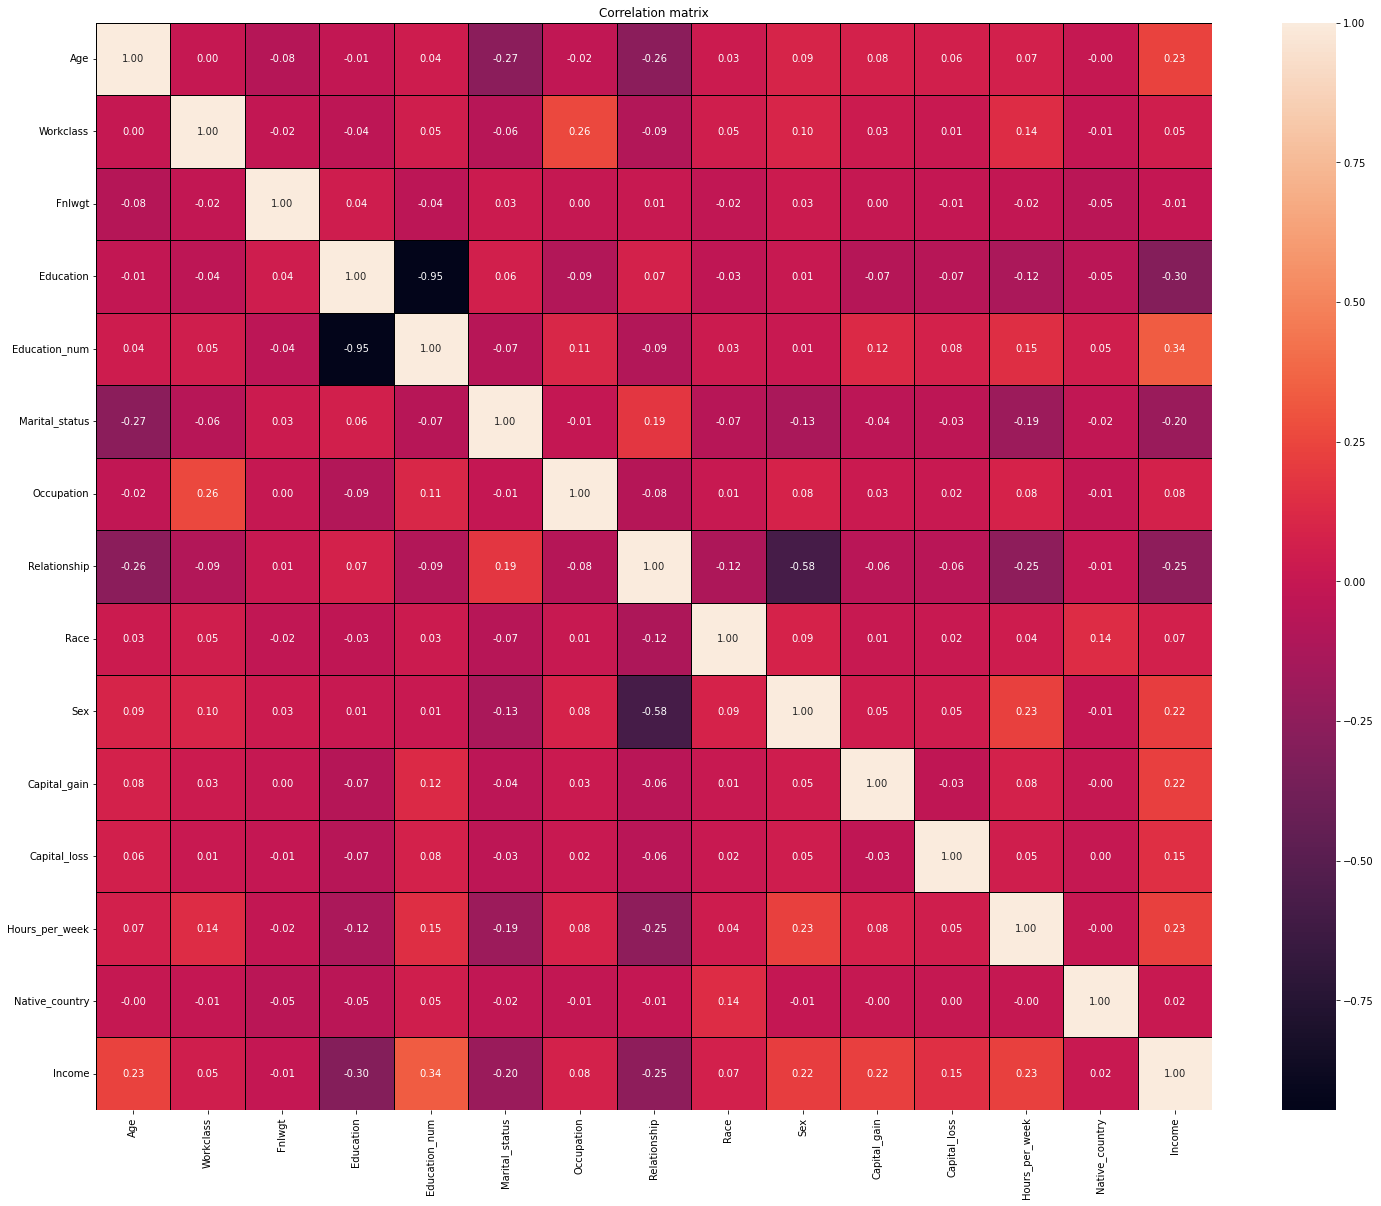

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

We can observe that :-
    
    1)The heatmap contains both positive and negative corelation

    2)there is no multicolinearity problem in this dataset

    3)The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt ha very has correlation with the label so we can drop this column.
    
    4) We can observe that column 'Education_num' has highest relationship with target varibale and column 'Native_country' has very less relationship with target varibale

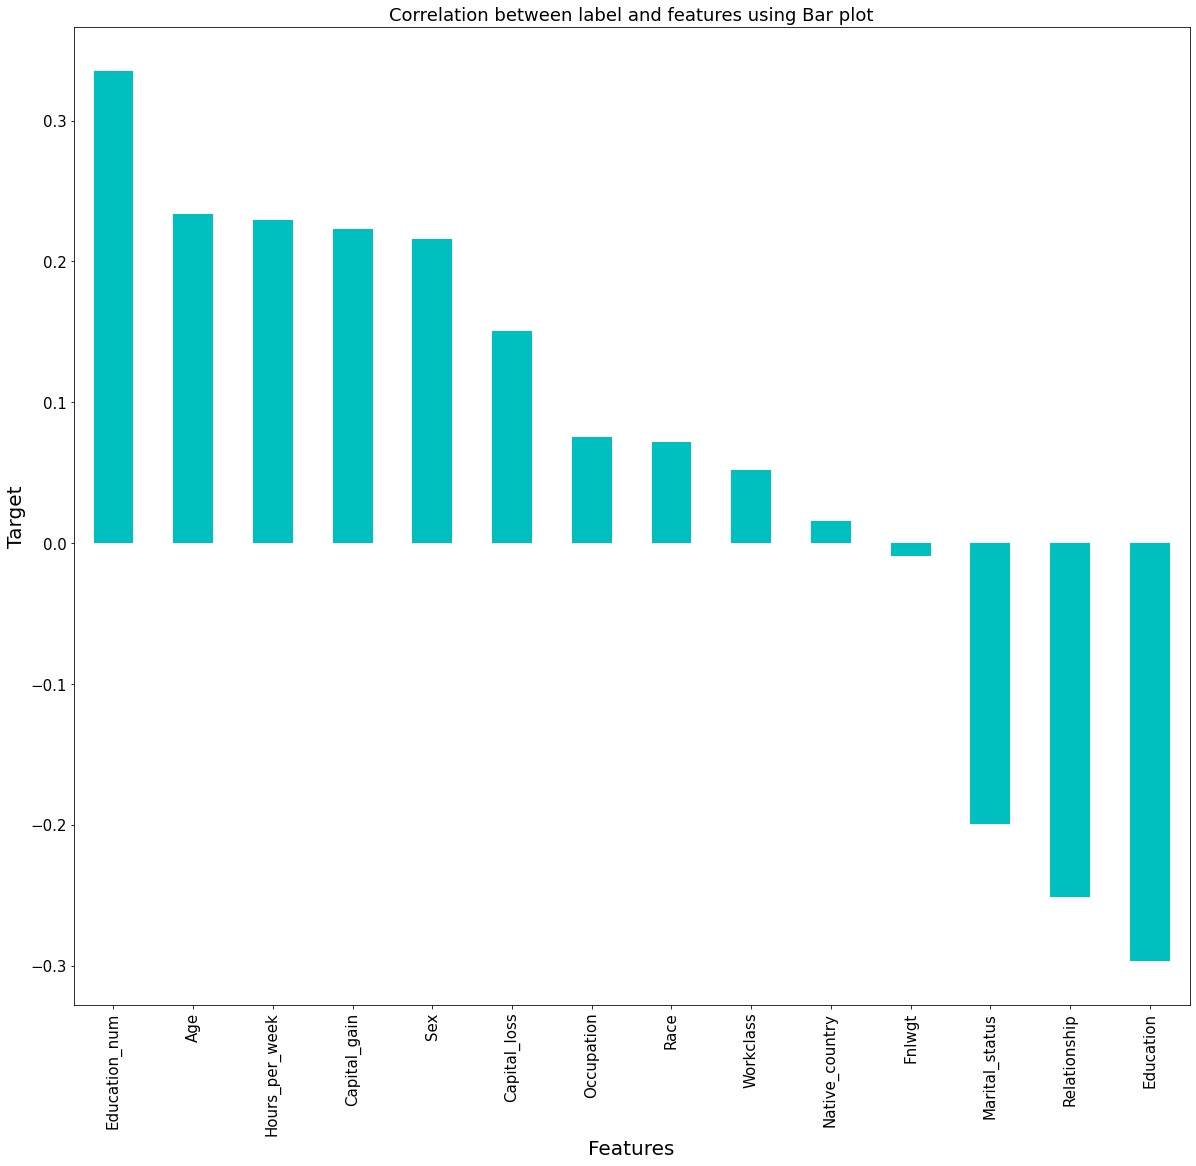

In [48]:
plt.figure(figsize=(20,18))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

POSITEVLY CORELATED COLUMN-:

['Education_num','Age','Hours_per_week','Capital_gain','Sex','Capital_loss','Occupation','Race','Workclass','Native_country']

NEGATIVELY CORELATED COLUMN-:


['Fnlwgt','Marital_status','Relationship','Native_country']

In [49]:
df=df.drop(columns=['Fnlwgt','Native_country'],axis=1)

# Checking Skewess

In [50]:
df_cont.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We can observe that columns ['Capital_gain','Capital_loss'] are highly skewed.

Setting skewness limit to -0.65to +0.65


# Checking for Outliers

In [51]:
df_cont.shape

(32560, 6)

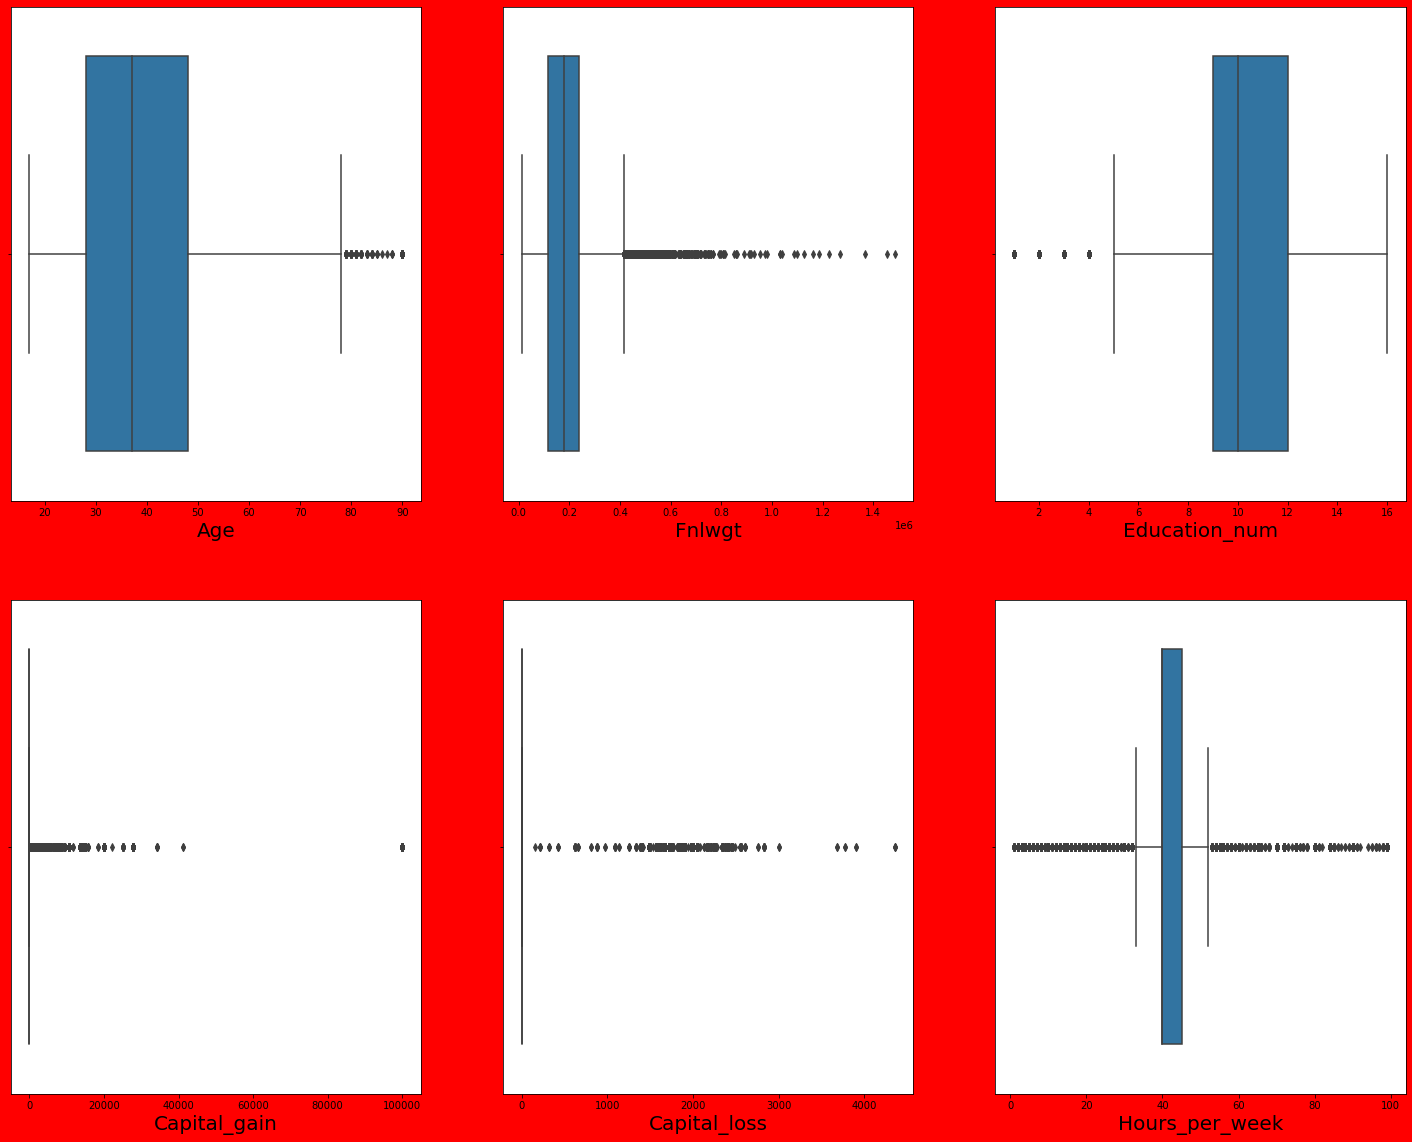

In [52]:
plt.figure(figsize=(25,20),facecolor= 'red')
plotnumber = 1


for column in df_cont:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        ax=sns.boxplot(df_cont[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can observe that all columns are having outliers in it

# DataPreprocessing

### Removing Outliers using Z-technique

In [53]:
num_col.remove('Fnlwgt')

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_col]))
z.shape
z

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.420027,0.145914,0.216663,0.035430
2,1.057031,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.134779,0.145914,0.216663,0.035430
4,0.115952,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...
32555,0.849066,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.420027,0.145914,0.216663,1.655200


In [55]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (32560, 13)
new dataframe (30150, 13)
total number of rows dropped 2410


We can observe that total number of rows dropped are 2410

### Percentage data loss

In [56]:
loss_percent=(32560-30150)/32560*100
loss_percent

7.401719901719901

We can see that data loss is less than 10%.So its safe to remove outliers

### Separating features and target variable as x and y

In [57]:
x=df_new.drop(columns=['Income'],axis=1)
y=df_new['Income']

In [58]:
x.shape

(30150, 12)

In [59]:
y.shape

(30150,)

# Handling imbalanced dataset

In [60]:
y.value_counts()

0    23424
1     6726
Name: Income, dtype: int64

Since target variable is imbalanced and size of dataset is small so we will do oversampling

### Over sampling using SMOTE

In [61]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
over_smpl=SMOTE(0.8)
x,y=over_smpl.fit_resample(x,y)

In [64]:
y.value_counts()

0    23424
1    18739
Name: Income, dtype: int64

# Removing skewness using data transforamtion

In [65]:
x.skew()

Age                0.341145
Workclass         -0.773374
Education          0.310096
Education_num     -0.231243
Marital_status     0.243529
Occupation         0.093290
Relationship       1.067504
Race              -2.617224
Sex               -0.906725
Capital_gain       3.549269
Capital_loss      34.640299
Hours_per_week    -0.349582
dtype: float64

In [66]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.83909409,  1.77591038, -1.13022648, ..., -0.36746573,
        -0.03480023, -2.36877772],
       [-0.04101357,  0.03518842,  0.75393493, ..., -0.36746573,
        -0.03480023, -0.1620039 ],
       [ 1.03981458,  0.03518842,  1.36246804, ..., -0.36746573,
        -0.03480023, -0.1620039 ],
       ...,
       [-1.09671392, -0.71314831, -0.99060956, ...,  2.72162182,
        -0.03480023, -0.34806301],
       [ 1.360483  , -1.36838203,  0.75393493, ..., -0.36746573,
        -0.03480023, -0.34806301],
       [ 0.26786732,  0.03518842,  0.48646014, ...,  2.72162182,
        -0.03480023,  0.31578047]])

In [67]:
x=pd.DataFrame(x_new,columns=x.columns)

In [68]:
x.skew()

Age               -0.031852
Workclass          0.101025
Education         -0.085299
Education_num     -0.003115
Marital_status    -0.020021
Occupation        -0.181639
Relationship       0.322964
Race              -2.118383
Sex               -0.906725
Capital_gain       2.353961
Capital_loss      28.701660
Hours_per_week     0.127820
dtype: float64

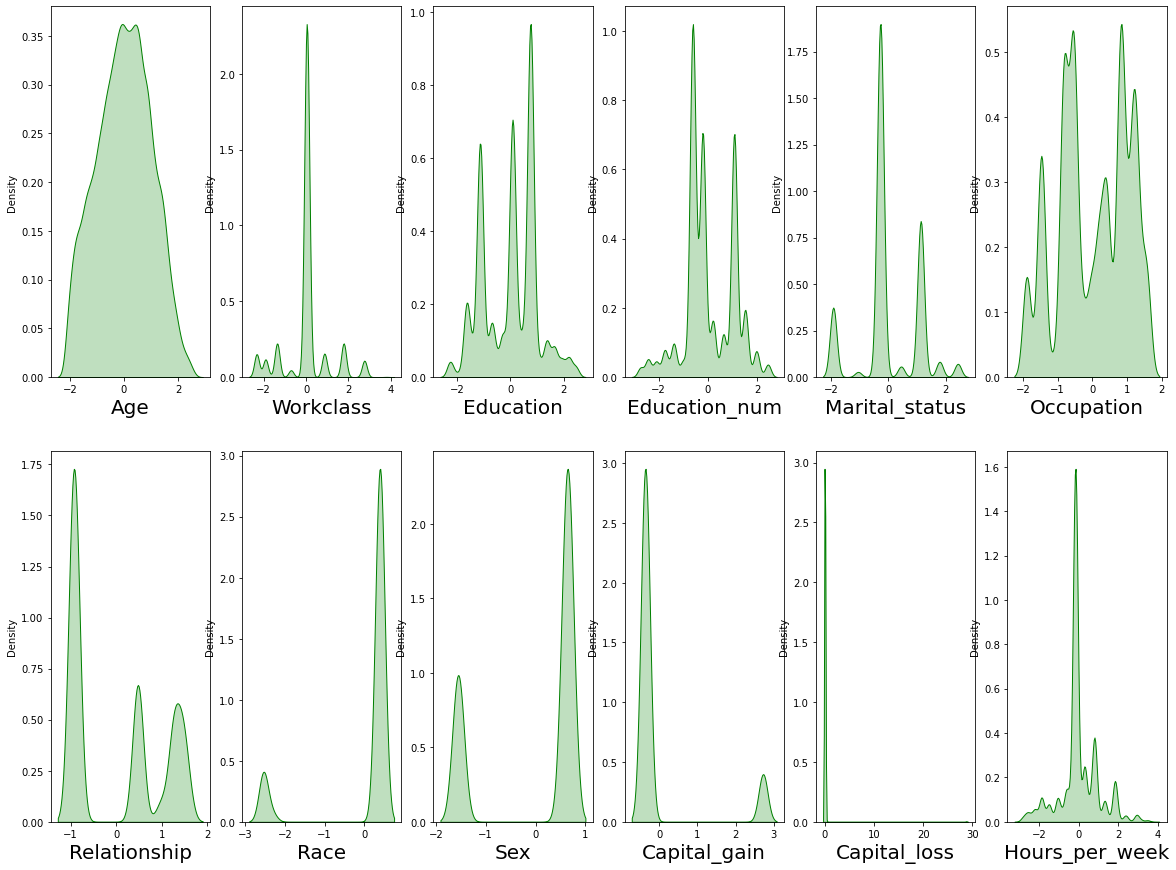

In [69]:
#Lets check the distribution of continous columns after datatransformation
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(x[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

In [70]:
x=x.drop(columns=['Capital_loss','Capital_gain'],axis=1)

We have dropped above columns because they are highly skewed after removing skewness.

# Data Standardisation

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week
0,0.839094,1.775910,-1.130226,1.058802,-0.284803,-0.543109,-0.922976,0.397783,0.644617,-2.368778
1,-0.041014,0.035188,0.753935,-0.618818,-1.934555,-0.043359,0.476207,0.397783,0.644617,-0.162004
2,1.039815,0.035188,1.362468,-1.385878,-0.284803,-0.043359,-0.922976,-2.537740,0.644617,-0.162004
3,-0.904155,0.035188,-1.130226,1.058802,-0.284803,0.818969,1.541554,-2.537740,-1.551309,-0.162004
4,-0.121071,0.035188,-1.636113,1.504207,-0.284803,-0.543109,1.541554,0.397783,-1.551309,-0.162004
...,...,...,...,...,...,...,...,...,...,...
42158,0.037864,0.035188,-1.636113,1.504207,-0.284803,-0.543109,-0.922976,0.397783,0.644617,-0.162004
42159,1.545377,0.867196,-1.350294,1.058802,-0.284803,0.818969,-0.922976,0.397783,0.644617,1.846566
42160,-1.096714,-0.713148,-0.990610,0.623244,-0.284803,0.818969,1.541554,0.397783,-1.551309,-0.348063
42161,1.360483,-1.368382,0.753935,-0.618818,-0.284803,-1.470622,1.541554,0.397783,-1.551309,-0.348063


# Check for multicollierinity

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.259394,Age
1,1.066674,Workclass
2,6.876216,Education
3,6.969273,Education_num
4,1.172304,Marital_status
5,1.082097,Occupation
6,2.202380,Relationship
7,1.024385,Race
8,1.829080,Sex
9,1.161211,Hours_per_week


In [73]:
x=x.drop(columns=['Education'],axis=1)

Dropping column('Education') and checking the multicollinearnity again

In [74]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.258867,Age
1,1.065115,Workclass
2,1.074091,Education_num
3,1.172192,Marital_status
4,1.081177,Occupation
5,2.201251,Relationship
6,1.024282,Race
7,1.827769,Sex
8,1.161093,Hours_per_week


We can see that VIF value is less than 5 for all columns .So there is no multicollinearity

# Model Training and Building

# Support Vector Machine

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

### Finding the best random state

In [76]:
max_acc=0
max_rs=0

for i in range(0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.8176212498517728 random state 0
max_accuracy 0.8176212498517728 max_random_state 0
Testing accuracy 0.8188070674730227 random state 1
max_accuracy 0.8188070674730227 max_random_state 1
Testing accuracy 0.8143009605122732 random state 2
Testing accuracy 0.8167911775168979 random state 3
Testing accuracy 0.808134708881774 random state 4
Testing accuracy 0.8220087750503973 random state 5
max_accuracy 0.8220087750503973 max_random_state 5
Testing accuracy 0.8196371398078975 random state 6
Testing accuracy 0.8176212498517728 random state 7
Testing accuracy 0.8216530297640223 random state 8
Testing accuracy 0.8097948535515238 random state 9
Testing accuracy 0.8215344480018973 random state 10
Testing accuracy 0.8179769951381477 random state 11
Testing accuracy 0.8096762717893988 random state 12
Testing accuracy 0.8165540139926479 random state 13
Testing accuracy 0.8226016838610222 random state 14
max_accuracy 0.8226016838610222 max_random_state 14
Testing accuracy 0.8223645

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)


In [79]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [80]:
svm.fit(x_train,y_train)

SVC()

In [81]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:81.909280%


In [82]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:82.260168%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      4642
           1       0.77      0.86      0.81      3791

    accuracy                           0.82      8433
   macro avg       0.82      0.83      0.82      8433
weighted avg       0.83      0.82      0.82      8433



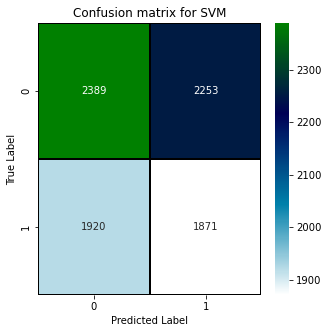

In [84]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()


# X-Gradient Boosting

In [85]:
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:87.225022%


In [88]:
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:84.667378%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4642
           1       0.82      0.85      0.83      3791

    accuracy                           0.85      8433
   macro avg       0.84      0.85      0.85      8433
weighted avg       0.85      0.85      0.85      8433



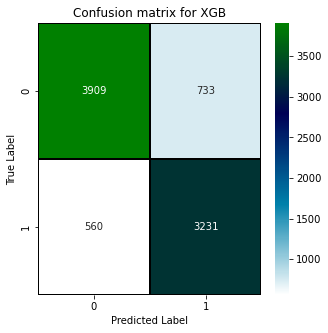

In [89]:
# Lets plot confusion matrix for XGB
pred_xgb=xgb.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_xgb)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for XGB")
plt.show()


# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf=RandomForestClassifier()

In [92]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:96.424548%


In [94]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.272145%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4642
           1       0.83      0.85      0.84      3791

    accuracy                           0.85      8433
   macro avg       0.85      0.85      0.85      8433
weighted avg       0.85      0.85      0.85      8433



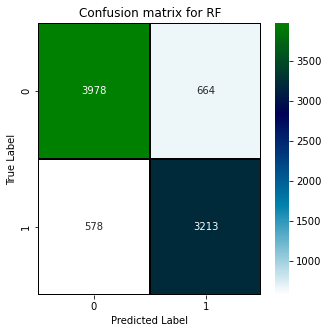

In [95]:
# Lets plot confusion matrix for RF
pred_rf=rf.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()


# K Nearest Neighbors(KNN)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier()

In [97]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:87.669730%


In [98]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.647575%
Classification report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4642
           1       0.80      0.85      0.82      3791

    accuracy                           0.84      8433
   macro avg       0.83      0.84      0.84      8433
weighted avg       0.84      0.84      0.84      8433



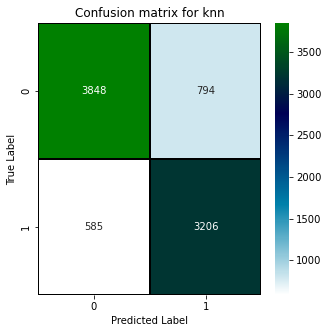

In [99]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for knn")
plt.show()


# Cross Validation Score

In [101]:
from sklearn.model_selection import cross_val_score


In [102]:
lssscore_selected=cross_val_score(svm,x,y,cv=5).mean()
print("the cross validation score for SVM is ",lssscore_selected)

the cross validation score for SVM is  0.815692231724514


In [103]:
lssscore_selected=cross_val_score(knn,x,y,cv=5).mean()
print("the cross validation score for KNN is ",lssscore_selected)

the cross validation score for KNN is  0.826127966822308


In [104]:
lssscore_selected=cross_val_score(xgb,x,y,cv=5).mean()
print("the cross validation score for XGB is ",lssscore_selected)

the cross validation score for XGB is  0.8446989452073504


In [105]:
lssscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("the cross validation score for RF is ",lssscore_selected)

the cross validation score for RF is  0.8494187468540394


# Conclusion
We can observe that at random state 14 and cv=5

SVM

 ------Testing Accuracy:82.26 and Cross val score:81.56--------
            
Random Forest

 ------Testing Accuracy:85.27 and Cross val score:84.94--------
            
KNN

 ------Testing Accuracy:83.64 and Cross val score:82.61--------
            
X-Gradient Boosting

------ Testing Accuracy:84.66 and Cross val score:84.46--------


# Plotting auc for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

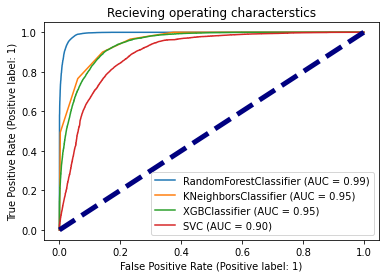

In [106]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


### We can say that Random Forest is the best model as it has highest testing accuracy and highest AUC score

# Hyperparameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# RandomForestClassifier
parameters = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6]}

In [109]:
grd=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1)

In [110]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6]})

In [111]:
print('best_parameters',grd.best_params_)

best_parameters {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2}


In [114]:
rf=RandomForestClassifier(criterion='entropy',max_depth=40,max_features='auto',min_samples_leaf=2)

In [115]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, max_features='auto',
                       min_samples_leaf=2)

In [116]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:92.214646%


In [117]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.651607%
Classification report
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4642
           1       0.83      0.86      0.84      3791

    accuracy                           0.86      8433
   macro avg       0.85      0.86      0.86      8433
weighted avg       0.86      0.86      0.86      8433



# Saving the best model

In [118]:
import pickle
pickle.dump(rf,open('classmodel_census','wb'))